In [6]:
# 인공신공망(분류)
# ADP - 딥러닝, 모델링을 통해서 지도학습을 인공신공망으로 어떻게 할지?
# 입력신호의 가중치 합을 계산하여 임계값과 비교
# 은닉층(BlackBox)
# 출력층은 활성화 함수를 통해 결정된다.
# 조정 할만한 매개변수 외의  GridSearch를 통해 찾을 수 있다.

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

credit = pd.read_csv("data/credit_final.csv")
X = credit.drop(['credit.rating'],axis=1)
y = credit['credit.rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=321)
X_train.head()

,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,guarantor,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
133,3,18,2,3,1453,1,1,3,1,1,1,1,26,2,2,1,3,1,1,1
464,2,12,2,4,7472,4,1,1,1,1,2,1,24,2,1,1,1,1,1,1
919,1,48,3,1,6331,1,4,4,3,1,4,4,46,2,3,2,3,1,2,1
865,3,15,3,3,1271,4,2,3,3,1,4,4,39,2,3,2,3,1,2,1
352,3,48,3,4,7629,4,4,4,1,1,2,3,46,1,2,2,4,2,1,1


In [8]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier() 
mlp.fit(X_train, y_train)

MLPClassifier()

In [9]:
mlp.get_params() # activation : relu, hidden_layer_sizes : 100, solver : adam

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [11]:
mlp.score(X_test,y_test) # 강의에서는 0.376이며 이는 낮은 것이다.

0.6766666666666666

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X_train.columns)

In [13]:
mlp.fit(X_train_scaled,y_train)
mlp.score(X_test_scaled,y_test)

/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7466666666666667

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7662383830176223

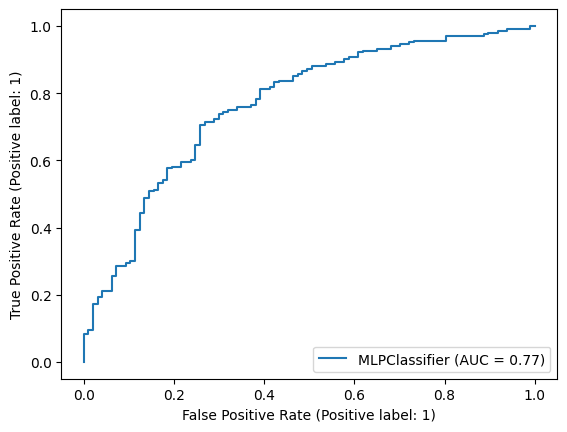

In [14]:
from sklearn.metrics import roc_auc_score, plot_roc_curve
plot_roc_curve(mlp, X_test_scaled, y_test)
roc_auc_score(y_test, mlp.predict_proba(X_test_scaled)[:,1])

In [ ]:
# 0.77 > 준수한 모델.

In [15]:
from sklearn.model_selection import GridSearchCV

# 테스트하고자 하는 파라미터 값들을 사전타입으로 정의

parameters = {'hidden_layer_sizes':[10,30,50,100] ,
              'solver': ['sgd', 'adam'], 
              'activation' : ['tanh','relu'],
             'max_iter' : [1000]}

grid_mlp = GridSearchCV(MLPClassifier(), param_grid = parameters, cv = 5)
grid_mlp.fit(X_train_scaled, y_train)

result = pd.DataFrame(grid_mlp.cv_results_['params'])
result['mean_test_score'] = grid_mlp.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)
# Maximum iterations (1000) reached and the optimization hasn't converged yet. 
# > 최대 1000번 반복 내에 최적의 값을 찾지 못한다.

/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_m

,activation,hidden_layer_sizes,max_iter,solver,mean_test_score
4,tanh,50,1000,sgd,0.767143
14,relu,100,1000,sgd,0.767143
2,tanh,30,1000,sgd,0.760000
6,tanh,100,1000,sgd,0.757143
12,relu,50,1000,sgd,0.754286
10,relu,30,1000,sgd,0.751429
0,tanh,10,1000,sgd,0.747143
8,relu,10,1000,sgd,0.742857
13,relu,50,1000,adam,0.734286
15,relu,100,1000,adam,0.731429


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.8001117261693158

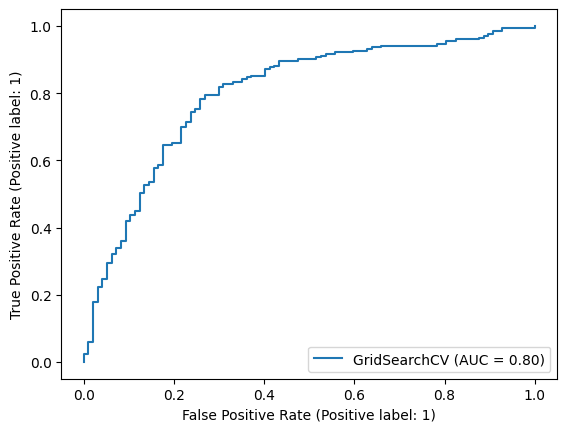

In [16]:
plot_roc_curve(grid_mlp, X_test_scaled, y_test)
roc_auc_score(y_test,grid_mlp.predict_proba(X_test_scaled)[:,1])

In [18]:
# 해당 데이터를 사용한 모든 모델들 중에서 가장 높은 성능(강의상, 실제로 확인 필요)

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, grid_mlp.predict(X_test_scaled))

array([[ 44,  53],
       [ 17, 186]])

In [ ]:
# 인공신공망(회귀)
# 매개변수 튜닝 多 > 데이터 크기가 많으면 SVM와 같이 튜닝하기가 어렵다.
# GridSearch 외의 어떻게 조정?

In [21]:
import pandas as pd 
df = pd.read_csv('data/kc_house_data.csv')
df = df.drop(['id','date'], axis=1)

X = df.drop('price',axis=1)
y = df['price']

X = pd.get_dummies(data = X, columns=['waterfront'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=2021)

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X_train.columns)

In [24]:
from sklearn.neural_network import MLPRegressor

mlpr = MLPRegressor()
mlpr.fit(X_train_scaled, y_train)

/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

In [25]:
# R2값이 -이면, 모델이 잘못 적합되었다.
print("train data R2 : ",mlpr.score(X_train_scaled, y_train))
print("test data R2 : ",mlpr.score(X_test_scaled,y_test))

train data R2 :  -1.1931635794585924
test data R2 :  -1.1851233791679578


In [26]:
# 다층 퍼셉트론 모델(더 깊게 학습한다. 깊게 학습할수록 딥러닝, 인공신공망은 딥러닝의 기초)
# 시험장에서는 3층까지 해도 성능이 좋다.
mlpr = MLPRegressor(hidden_layer_sizes=(64,64,64,64,64), activation='relu', max_iter = 1000, random_state=2021)
mlpr.fit(X_train_scaled, y_train)

MLPRegressor(hidden_layer_sizes=(64, 64, 64, 64, 64), max_iter=1000,
             random_state=2021)

In [27]:
print("train data R2 : ",mlpr.score(X_train_scaled, y_train))
print("test data R2 : ",mlpr.score(X_test_scaled,y_test))

train data R2 :  0.8040855205565576
test data R2 :  0.7462992409208401


In [ ]:
# 인공신공망은 회귀계수를 구하기 어려우며, 예측은 잘하지만 어떠한 변수가 중요한지 알기 어렵다.

In [ ]:
# 머신러닝 > 지도 > 분류/회귀 (숲)
# 머신러닝, 어떠한 데이터를 학습?, 해석력/예측력 중요한가?, 기획력 중요
# 차원축소, 지도, 비지도